In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from sklearn import linear_model, metrics

In [25]:
df = pd.read_csv("F:/Edugrad/1557825053_Co2_emission_PredictionModel_Dataset/CO2 emission.csv")

In [26]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


YEAR – Year of manufacturing of the car.

MAKE – Manufacturing company name.

VEHICLECLASS – Type of vehicles like SUV or medium-sized etc.

ENGINESIZE – Size of the car’s engine (expressed in cc or cubic centimeter).

CYLINDERS – Number of Cylinders in the engine.

TRANSMISSION – Automatic or manual transmission with number of gears.

FUELTYPE – It indicates the type of fuel car use i.e. Diesel, Petrol, Z (Unleaded Petrol), etc.

FUELCONSUMPTION_CITY – Fuel consumption or Fuel economy of the car while running in the city

expressed in miles per gallon.

FUELCONSUMPTION_HWY - Fuel Consumption or Fuel economy of car on highway expressed in

miles per gallon.

FUELCONSUMPTION_COMB – Net or combination of Fuel Economy expressed in miles per gallon.

FUELCONSUMPTION_COMB_MPG – Total fuel economy expressed in miles per gallon.

CO2EMISSIONS – The CO2 emitted by the car expressed in grams.

In [27]:
df.shape

(1067, 13)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [29]:
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [30]:
tmp = df.isna().sum()

In [31]:
for i in df.columns.tolist():
    print(df[i].value_counts())
    print('')

2014    1067
Name: MODELYEAR, dtype: int64

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
TOYOTA           49
AUDI             49
GMC              49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
               

In [33]:
df.drop(['MODELYEAR'], axis=1, inplace=True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066
MAKE,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,ACURA,...,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO,VOLVO
MODEL,ILX,ILX,ILX HYBRID,MDX 4WD,RDX AWD,RLX,TL,TL AWD,TL AWD,TSX,...,S60 AWD,S60 AWD,S80,S80 AWD,XC60,XC60 AWD,XC60 AWD,XC70 AWD,XC70 AWD,XC90 AWD
VEHICLECLASS,COMPACT,COMPACT,COMPACT,SUV - SMALL,SUV - SMALL,MID-SIZE,MID-SIZE,MID-SIZE,MID-SIZE,COMPACT,...,COMPACT,COMPACT,MID-SIZE,MID-SIZE,SUV - SMALL,SUV - SMALL,SUV - SMALL,SUV - SMALL,SUV - SMALL,SUV - STANDARD
ENGINESIZE,2,2.4,1.5,3.5,3.5,3.5,3.5,3.7,3.7,2.4,...,2.5,3,3.2,3,3.2,3,3.2,3,3.2,3.2
CYLINDERS,4,4,4,6,6,6,6,6,6,4,...,5,6,6,6,6,6,6,6,6,6
TRANSMISSION,AS5,M6,AV7,AS6,AS6,AS6,AS6,AS6,M6,AS5,...,AS6,AS6,AS6,AS6,AS6,AS6,AS6,AS6,AS6,AS6
FUELTYPE,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,X,X,X,X,X,X,X,X,X,X
FUELCONSUMPTION_CITY,9.9,11.2,6,12.7,12.1,11.9,11.8,12.8,13.4,10.6,...,11.6,13.2,11.9,13.2,13,13.4,13.2,13.4,12.9,14.9
FUELCONSUMPTION_HWY,6.7,7.7,5.8,9.1,8.7,7.7,8.1,9,9.5,7.5,...,8.3,9.5,8.1,9.5,8.9,9.8,9.5,9.8,9.3,10.2
FUELCONSUMPTION_COMB,8.5,9.6,5.9,11.1,10.6,10,10.1,11.1,11.6,9.2,...,10.1,11.5,10.2,11.5,11.2,11.8,11.5,11.8,11.3,12.8


Looking at the data above the key features can be determined

1) Categorical Variable and 2) Continous Variables

Categorical Variables : Make, Vehicle Class , Cylinders, Transmission, FuelType (Make, Vehicle Class and Transmission will still need to analysed if these are required for regression analysis)

Continous numerical variables : EngineSize, Fuel Consumption (City, Highway and Combined)


Separating categoric from numeric variables:

In [36]:
emission_new = [c for c in df if pd.api.types.is_numeric_dtype(df[c])]
emission_new

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [37]:
cat_vars = [c for c in df if not c in num_vars]
cat_vars

['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']

In [43]:
emission_new = df[['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']]

In [46]:
emission_new.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


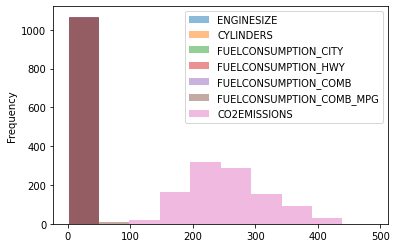

In [48]:
emission_new.plot.hist(bins=10, alpha=0.5)

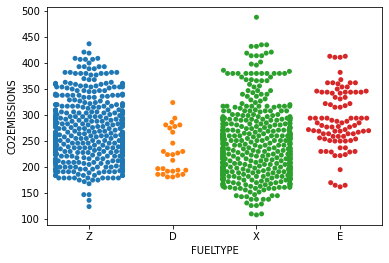

In [51]:
sns.swarmplot(x='FUELTYPE',y='CO2EMISSIONS',data=df)

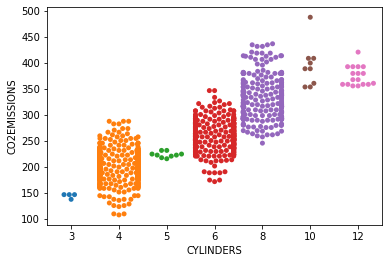

In [52]:
sns.swarmplot(x='CYLINDERS',y='CO2EMISSIONS',data=df)

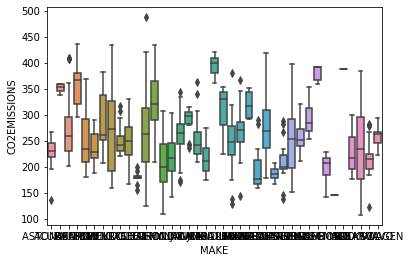

In [63]:
sns.boxplot(x='MAKE',y='CO2EMISSIONS',data=df)

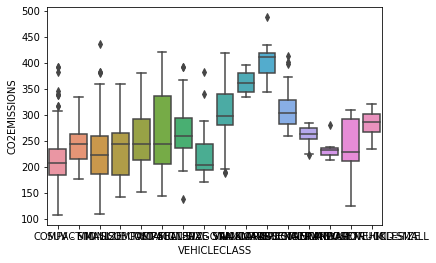

In [59]:
sns.boxplot(x='VEHICLECLASS',y='CO2EMISSIONS',data=df)

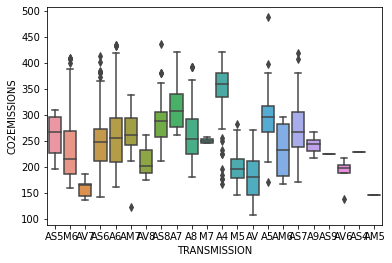

In [65]:
sns.boxplot(x='TRANSMISSION',y='CO2EMISSIONS',data=df)

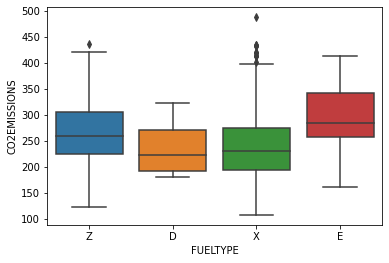

In [66]:
sns.boxplot(x='FUELTYPE',y='CO2EMISSIONS',data=df)

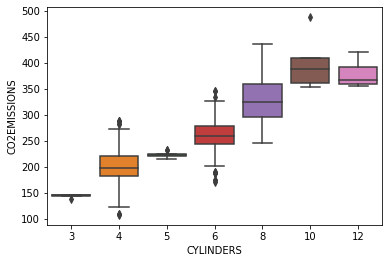

In [67]:
sns.boxplot(x='CYLINDERS',y='CO2EMISSIONS',data=df)

In [69]:
def categorise(a):
    if a == 'Z':
        return 1
    elif a == 'D':
        return 2
    elif a == 'X':
        return 3
    else:
        return 4

In [70]:
df['FUELTYPE_CAT'] = df['FUELTYPE'].apply(lambda x : categorise(x))

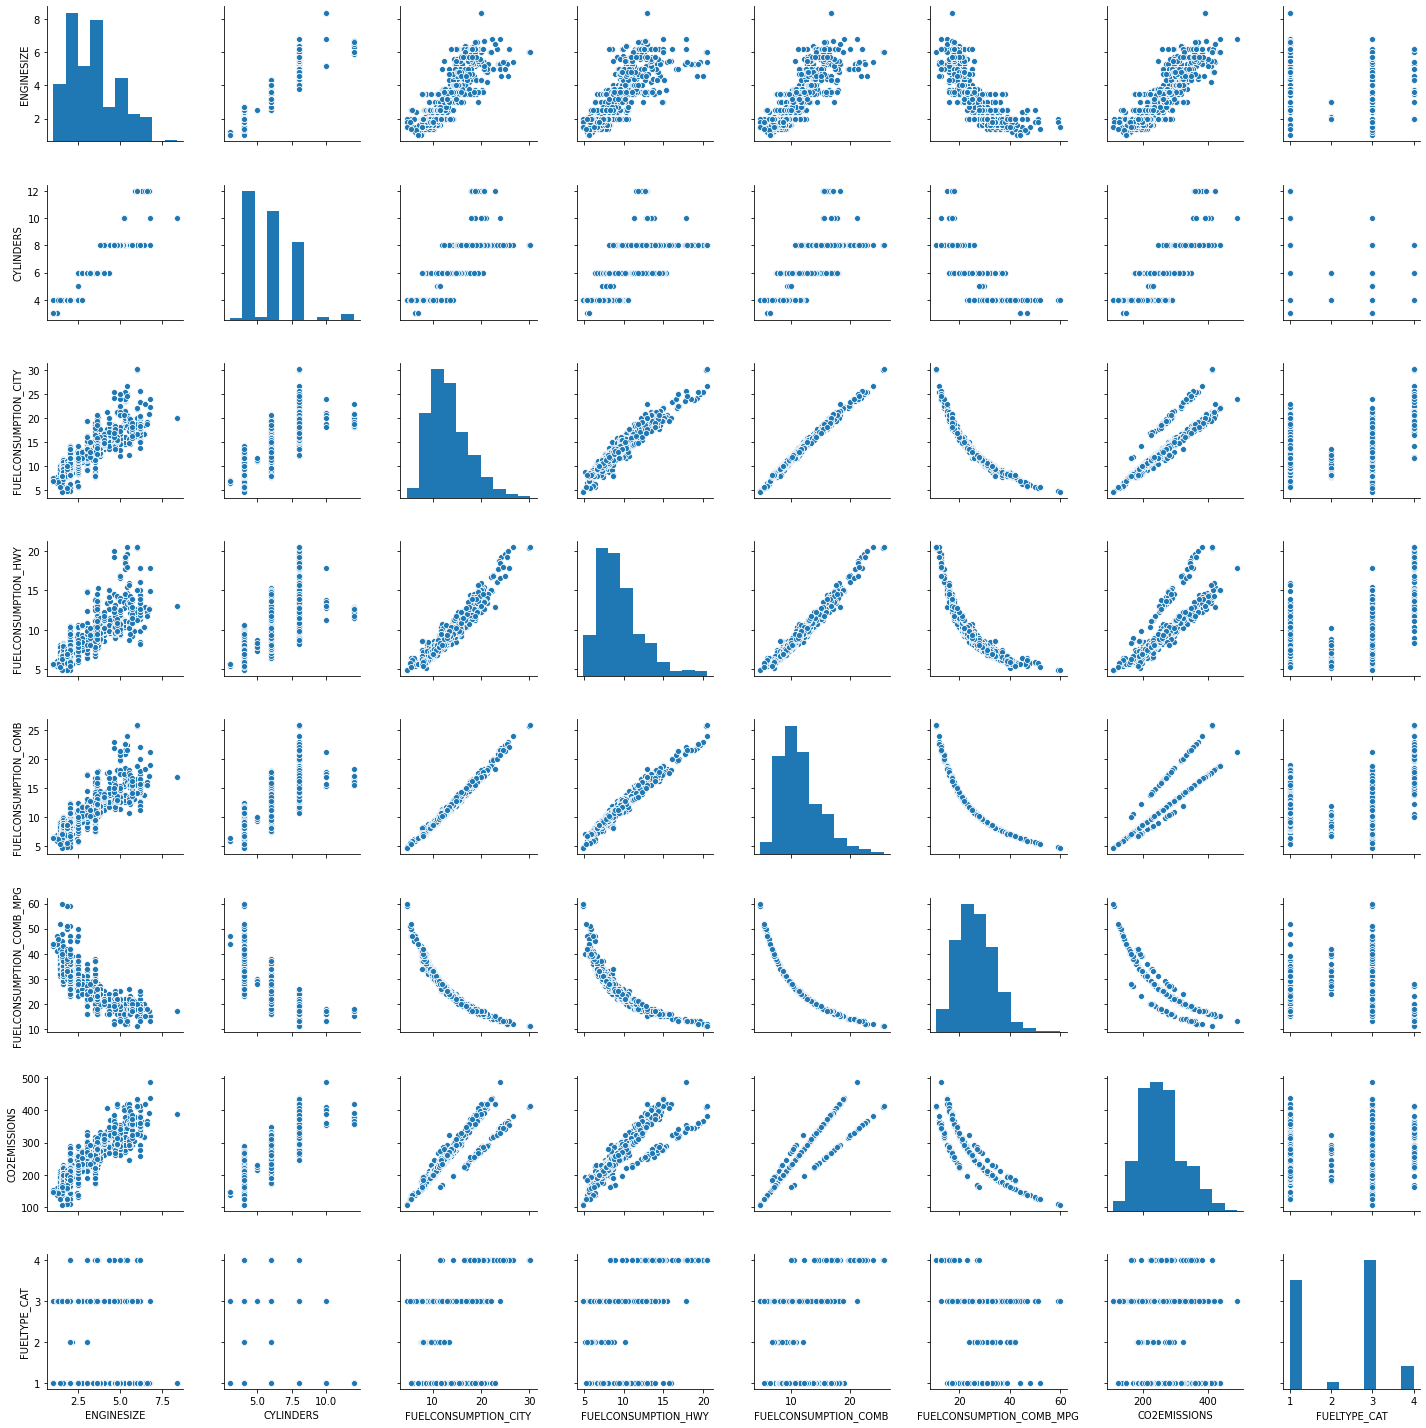

In [71]:
sns.pairplot(df)

Comparing them with the CO2EMISSIONS which is the last row, we can see that:

'MODELYEAR' has got no impact on the said column.

'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY' are having a strong positive correlation.

We will 'FUELCONSUMPTION_COMB' into account which is the combination of both highway and city fuel consumption

In [74]:
df.corr().T


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_CAT
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154,-0.075066
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685,-0.171923
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039,0.125776
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748,0.194845
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129,0.151901
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394,-0.027428
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000,-0.091596
FUELTYPE_CAT,-0.075066,-0.171923,0.125776,0.194845,0.151901,-0.027428,-0.091596,1.000000


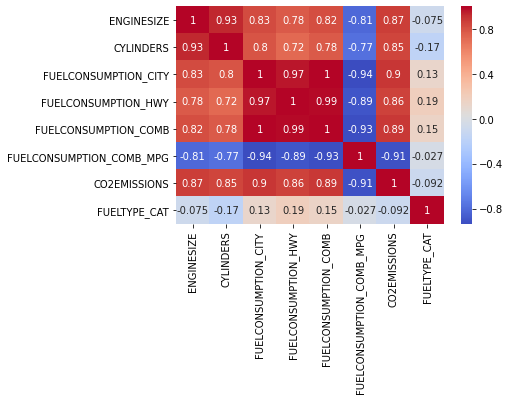

In [76]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

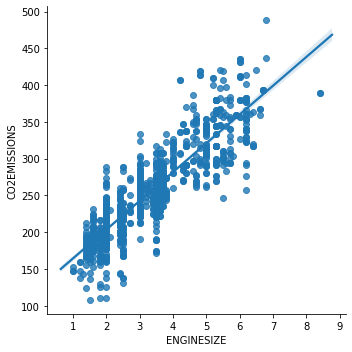

In [77]:
sns.lmplot('ENGINESIZE','CO2EMISSIONS',df,order=1)

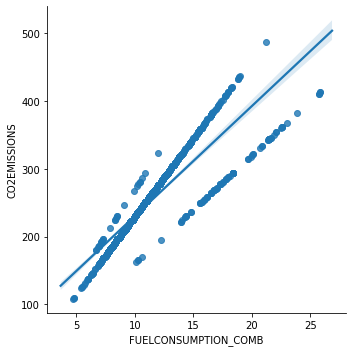

In [79]:
sns.lmplot('FUELCONSUMPTION_COMB','CO2EMISSIONS',df)

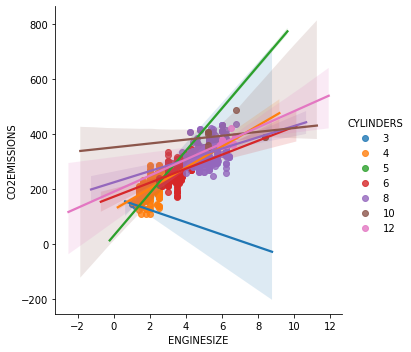

In [80]:
sns.lmplot('ENGINESIZE','CO2EMISSIONS',hue='CYLINDERS',data=df)

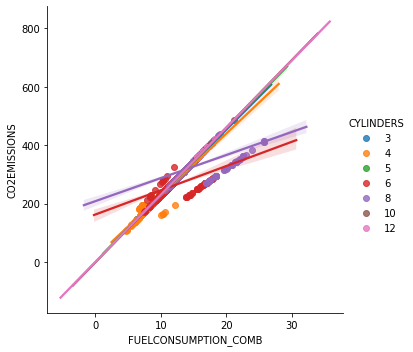

In [81]:
sns.lmplot('FUELCONSUMPTION_COMB','CO2EMISSIONS',hue='CYLINDERS',data=df)

A healthy correlation was noted on above graphs. There is spread noted when Cylinder is added to the LMPLOT. Given that Cylinder is impact the regression we should consider this for better prediction

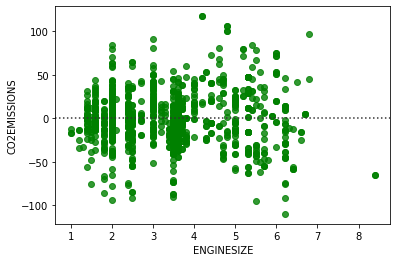

In [82]:
sns.residplot('ENGINESIZE','CO2EMISSIONS',df,color='g')

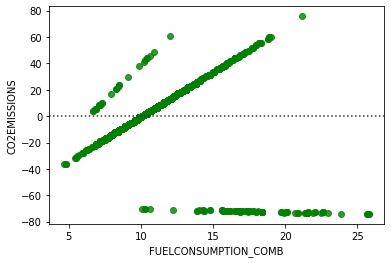

In [83]:
sns.residplot('FUELCONSUMPTION_COMB','CO2EMISSIONS',df,color='g')

Since the points are sparsely dispersed , Enginesize is a good canditate for linear regression analysis

Pearson's correlation (P-Values)

In [84]:
def thresh_pvalue(p_value):
    if p_value <= 0.001:
        print("The p_value is {:f} is less than threshold of 0.001 and is strong fit for regression analysis".format(float(p_value)))
    elif ((p_value > 0.001) & (p_value < 0.05)):
        print("The p_value is {:f} is less than threshold of 0.05 and greater than 0.001 and is moderate fit for regression analysis".format(float(p_value)))
    elif ((p_value > 0.05) & (p_value < 0.1)):
        print("The p_value is {:f} is less than threshold of 0.1  and greater than 0.05 abd is a weak fit for regression analysis".format(float(p_value)))
    else:
        print("The p_value is {:f} is greater than 0.1 and is not a good fit for regression analysis".format(float(p_value)))

In [86]:
import scipy.stats as stats

In [87]:
pearson_coef, p_value = stats.pearsonr(df['ENGINESIZE'], df['CO2EMISSIONS'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
thresh_pvalue(p_value)

The Pearson Correlation Coefficient is 0.8741543683958123  with a P-value of P = 0.0
The p_value is 0.000000 is less than threshold of 0.001 and is strong fit for regression analysis


In [88]:
pearson_coef, p_value = stats.pearsonr(df['CYLINDERS'], df['CO2EMISSIONS'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
thresh_pvalue(p_value)

The Pearson Correlation Coefficient is 0.8496845920141144  with a P-value of P = 2.7709372039867746e-298
The p_value is 0.000000 is less than threshold of 0.001 and is strong fit for regression analysis


In [89]:
pearson_coef, p_value = stats.pearsonr(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
thresh_pvalue(p_value)

The Pearson Correlation Coefficient is 0.8921285933157568  with a P-value of P = 0.0
The p_value is 0.000000 is less than threshold of 0.001 and is strong fit for regression analysis


Hence, all three are good for regression analysis to get correct picture/model for prediction

Linear Regression Model Prediction

In [92]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Instantaniate linear regression constructor
regr = linear_model.LinearRegression()

## Define Predictors
Predictors = ['FUELTYPE_CAT','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
x = df[['FUELTYPE_CAT','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


## Fit the model
a = regr.fit (x_train, y_train)

# The coefficients and intercept
print("The Y-Intercept is",regr.intercept_, " with the slope value of ", regr.coef_)

## Run the prediction
y_hat= regr.predict(x_test[Predictors])


# Print residual errors
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
rmse = np.sqrt(mean_squared_error(y_test,y_hat))
print("Root Mean Squared Error: {}".format(rmse))
#print("R2-score: %.2f" % r2_score(y_hat , y_test) )
print("R^2-score: %.2f" % regr.score(x_test , y_test) )

#print(a.summary())

The Y-Intercept is 87.92404406635086  with the slope value of  [-9.40980127 11.66378898  2.63182748 11.70208077]
Mean absolute error: 16.97
Residual sum of squares (MSE): 488.45
Root Mean Squared Error: 22.100806506664817
R^2-score: 0.88


Polynomial Regression Model Prediction

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Define Predictors
Predictors = ['FUELTYPE_CAT','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
x = df[['FUELTYPE_CAT','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Fit the model
poly = PolynomialFeatures(degree=5)
train_x_poly = poly.fit_transform(x_train)

clf = LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

## Run the prediction
test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)

# Print residual errors
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )
#print("R^2-score: %.2f" % regr.score(x_test , y_test) )

#rmse = np.sqrt(mean_squared_error(y_test,y_hat))
#print("Root Mean Squared Error: {}".format(rmse))
#print("R2-score: %.2f" % r2_score(y_hat , y_test) )

Coefficients:  [-1.50796353e-04 -1.65262560e+01 -3.43807717e+02  4.17705778e+02
  2.67225603e+01 -3.77219519e+01 -2.99468367e+02  3.29073253e+02
  1.29047715e+01  7.89393157e+01  1.53754347e+02 -3.41272120e+01
 -6.93100001e+01  5.69406748e+00  2.11144067e-01 -5.27892678e+01
 -2.00351786e+02  2.13473264e+02 -1.00787151e+00  5.43207830e+01
  1.59784698e+02  3.91807758e+01 -2.28953610e+02 -2.55529981e+01
  1.57485344e+00  2.56803879e+01 -8.15818617e+01 -4.59813090e+00
  1.47356946e+01  8.82656332e+00  7.84431527e-02 -4.59431403e+00
 -7.41807375e-02  1.01586640e-01 -8.84426731e-02 -3.39372048e+01
 -2.55174869e+01  9.81444283e+01 -3.83755392e+00 -2.39496171e+01
  1.75505145e+02 -1.73548684e+01 -1.64350190e+02  1.16505207e+01
 -3.24181773e-02  5.04344394e+00 -1.35190733e+01  8.61512698e-01
 -8.56957122e+01 -4.00648665e+00  7.59747077e-01  9.05795450e+01
  2.16717942e+00 -5.17674005e-01 -6.93880949e-02  1.70436533e+00
 -6.84958385e+00 -2.06848614e+00  1.28887313e+01  5.12843793e+00
 -1.063835

Predicted values for test dataset

In [94]:
final_df = pd.DataFrame(x_test)
final_df.columns = Predictors
final_df['CO2EMISSIONS'] = y_test
final_df['CO2EMISSIONS_PRE'] = test_y_  ## Replace yHat with test_y_ to enable polynomial values
final_df.head()

,FUELTYPE_CAT,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,CO2EMISSIONS_PRE
732,1,4.7,8,13.2,304,303.634775
657,3,3.5,6,9.6,221,221.050759
168,1,3.6,6,12.8,294,294.474137
86,1,3.0,6,9.6,221,220.919871
411,3,2.0,4,9.0,207,207.053216


MODEL FITTING MULTI LINEAR REGRESSION

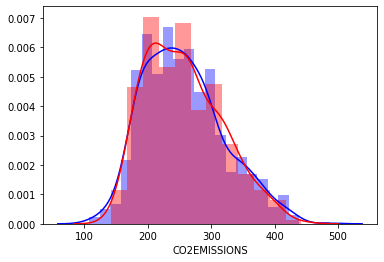

In [95]:
ax2 = sns.distplot(df['CO2EMISSIONS'],color='b',hist=True,label='Actual')
sns.distplot(y_hat,color='r',label='Predicted',hist=True,ax=ax2)

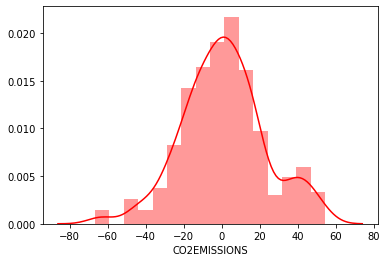

In [96]:
sns.distplot((y_hat-y_test), color='r')

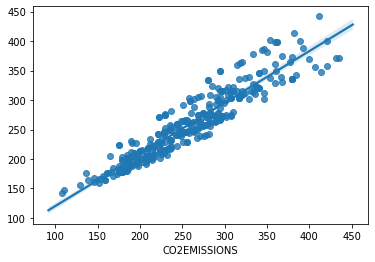

In [97]:
sns.regplot(y_test, y_hat)

MODEL FITTING POLYNOMIAL REGRESSION

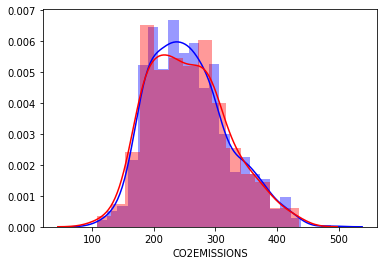

In [98]:
ax2 = sns.distplot(df['CO2EMISSIONS'],color='b',hist=True,label='Actual')
sns.distplot(test_y_,color='r',label='Predicted',hist=True,ax=ax2)

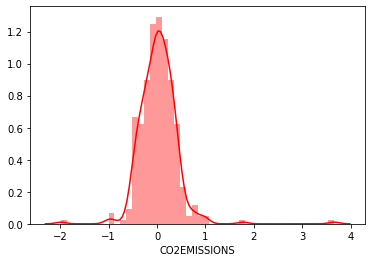

In [99]:
sns.distplot((test_y_-y_test), color='r')

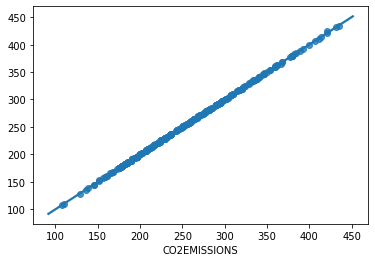

In [100]:
sns.regplot(y_test, test_y_)

# Model fits very well for Polynomial regression

---------